In [1]:
from utils import *

import umap
import pacmap
import openTSNE

# kNN acc

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def knn_acc(dataset, dr, labels, k=5):

    z = np.load("./data/rebuttal/{}_{}.npy".format(dataset, dr))

    knn_clf = KNeighborsClassifier(n_neighbors=5)

    scores = cross_val_score(knn_clf, z, labels, cv=5)

    return scores.mean(), scores.std()

# simulation

In [43]:
# def gauss_clusters(
#     n_clusters=10, dim=10, pts_cluster=100, random_state=None, cov=1, stepsize=1,
# ):

#     if random_state is None:
#         rng = np.random.RandomState()
#     else:
#         rng = random_state

#     n = n_clusters * pts_cluster

#     s = stepsize / np.sqrt(dim)
#     means = np.linspace(np.zeros(dim), n_clusters * s, num=n_clusters, endpoint=False)
#     cshift_mask = np.zeros(n_clusters, dtype=bool)
#     cshift_mask[15] = True
#     cov = np.eye(dim) * cov

#     clusters = np.array(
#         [rng.multivariate_normal(m, cov, size=(pts_cluster)) for m in means]
#     )

#     X = np.reshape(clusters, (-1, dim))

#     y = np.repeat(np.arange(n_clusters), pts_cluster)
#     return X, y

# data, labels = gauss_clusters(
#     n_clusters=20,
#     dim=50,
#     pts_cluster=1000,
#     stepsize=6,
#     random_state=None,
# )

# data.shape, labels.shape

((20000, 50), (20000,))

In [44]:
# np.save("./data/rebuttal/simulation_data.npy", data)
# np.save("./data/rebuttal/simulation_labels.npy", labels)

In [13]:
data = np.load("./data/rebuttal/simulation_data.npy")
labels = np.load("./data/rebuttal/simulation_labels.npy")

data.shape, labels.shape

((20000, 50), (20000,))

In [4]:
# # tsne
# tsne_reducer = openTSNE.TSNE()
# z = tsne_reducer.fit(data)
# z = np.array(z)

# np.save("./data/rebuttal/simulation_tsne.npy", z)

# # umap
# umap_reducer = umap.UMAP()
# z = umap_reducer.fit_transform(data)

# np.save("./data/rebuttal/simulation_umap.npy", z)

# # pacmap
# pacmap_reducer = pacmap.PaCMAP()
# z = pacmap_reducer.fit_transform(data)

# np.save("./data/rebuttal/simulation_pacmap.npy", z)

In [5]:
for dr in ["tsne", "umap", "pacmap"]:
    print(dr, knn_acc(dataset="simulation", dr=dr, labels=labels, k=5))

tsne (0.9947999999999999, 0.0008573214099741151)
umap (0.9949, 0.0007516648189186291)
pacmap (0.9953499999999998, 0.0012903487900564016)


In [15]:
for dr in ["tsne", "umap", "pacmap"]:
    z = np.load("./data/rebuttal/simulation_{}.npy".format(dr))
    draw_z(z=normalise(z), cls=labels, s=1, display=False, save_path="./data/rebuttal/simulation_{}.png".format(dr))

# single cell transcriptomics

In [16]:
data = np.load("../DVHL_others/exp2/data.npy")
labels = np.load("../DVHL_others/exp2/labels.npy")

In [7]:
# # tsne
# tsne_reducer = openTSNE.TSNE()
# z = tsne_reducer.fit(data)
# z = np.array(z)

# np.save("./data/rebuttal/bio_tsne.npy", z)

# # umap
# umap_reducer = umap.UMAP()
# z = umap_reducer.fit_transform(data)

# np.save("./data/rebuttal/bio_umap.npy", z)

# # pacmap
# pacmap_reducer = pacmap.PaCMAP()
# z = pacmap_reducer.fit_transform(data)

# np.save("./data/rebuttal/bio_pacmap.npy", z)

In [8]:
for dr in ["tsne", "umap", "pacmap"]:
    print(dr, knn_acc(dataset="bio", dr=dr, labels=labels, k=5))

tsne (0.9782462404883031, 0.004144012674001052)
umap (0.9706496331582818, 0.004064311039689509)
pacmap (0.9640888084837431, 0.004142987612664249)


In [17]:
for dr in ["tsne", "umap", "pacmap"]:
    z = np.load("./data/rebuttal/bio_{}.npy".format(dr))
    draw_z(z=normalise(z), cls=labels, s=1, display=False, save_path="./data/rebuttal/bio_{}.png".format(dr))

# MNIST

In [18]:
data = np.load("./data/MNIST/X_train.npy")
labels = np.load("./data/MNIST/y_train.npy")


data.shape, labels.shape

((60000, 784), (60000,))

In [10]:
# # tsne
# tsne_reducer = openTSNE.TSNE()
# z = tsne_reducer.fit(data)
# z = np.array(z)

# np.save("./data/rebuttal/mnist_tsne.npy", z)

# # umap
# umap_reducer = umap.UMAP()
# z = umap_reducer.fit_transform(data)

# np.save("./data/rebuttal/mnist_umap.npy", z)

# # pacmap
# pacmap_reducer = pacmap.PaCMAP()
# z = pacmap_reducer.fit_transform(data)

# np.save("./data/rebuttal/mnist_pacmap.npy", z)

In [11]:
for dr in ["tsne", "umap", "pacmap"]:
    print(dr, knn_acc(dataset="mnist", dr=dr, labels=labels, k=5))

tsne (0.9705833333333332, 0.0011303883305208648)
umap (0.9678833333333333, 0.0007575545451575475)
pacmap (0.9729333333333334, 0.0008406346808612327)


In [19]:
for dr in ["tsne", "umap", "pacmap"]:
    z = np.load("./data/rebuttal/mnist_{}.npy".format(dr))
    draw_z(z=normalise(z), cls=labels, s=1, display=False, save_path="./data/rebuttal/mnist_{}.png".format(dr))

# mnist dataset

In [5]:
import torch

data = np.load("./runs/DVHL__ppo__0804220508__3407_inference_random/data_online_20000.npy")
labels = np.load("./runs/DVHL__ppo__0804220508__3407_inference_random/labels_online_20000.npy")

for i in range(8):
    z = torch.load("./runs/DVHL__ppo__0804220508__3407_inference_random/z_iter1_step{}.pt".format(i))
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn_clf, z.numpy(), labels, cv=5)

    print(scores.mean())

0.88885
0.8663000000000001
0.9249500000000002
0.8923
0.86115
0.8831
0.84465
0.8164


In [6]:
reducer = pacmap.PaCMAP()
z = reducer.fit_transform(data)
knn_clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clf, z, labels, cv=5)
print(scores.mean())

0.95455


In [8]:
reducer = openTSNE.TSNE()
z = reducer.fit(data)
knn_clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clf, np.array(z), labels, cv=5)
print(scores.mean())

0.9563500000000001


In [20]:
for i in range(11):
    z = torch.load("./runs/DVHL__ppo__0804220508__3407_inference_random1/z_iter1_step{}.pt".format(i))
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn_clf, np.array(z), labels, cv=5)
    print(i, scores.mean())

0 0.8926999999999999
1 0.8609
2 0.91885
3 0.89085
4 0.87035
5 0.8661
6 0.86715
7 0.87325
8 0.8477499999999999
9 0.8201499999999999
10 0.8300500000000002


In [36]:
path = "DVHL__ppo__0804220508__3407_inference_random2"
data = np.load("./runs/{}/data_online_20000.npy".format(path))
labels = np.load("./runs/{}/labels_online_20000.npy".format(path))

reducer = pacmap.PaCMAP()
z = reducer.fit_transform(data)
knn_clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clf, z, labels, cv=10)
print(scores.mean())

0.9539000000000002


In [34]:
for i in range(8):
    z = torch.load("./runs/{}/z_iter1_step{}.pt".format(path, i))
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn_clf, np.array(z), labels, cv=5)
    print(i, scores.mean())

0 0.9316000000000001
1 0.91975
2 0.8983500000000001
3 0.8196
4 0.8541000000000001
5 0.8592000000000001
6 0.8112
7 0.8080999999999999


In [37]:
path = "DVHL__ppo__0804220508__3407_inference_random3"
data = np.load("./runs/{}/data_online_20000.npy".format(path))
labels = np.load("./runs/{}/labels_online_20000.npy".format(path))

reducer = pacmap.PaCMAP()
z = reducer.fit_transform(data)
knn_clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_clf, z, labels, cv=10)
print(scores.mean())

0.9561


In [42]:
for i in range(3):
    z = torch.load("./runs/{}/z_iter1_step{}.pt".format(path, i))
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn_clf, np.array(z), labels, cv=5)
    print(i, scores.mean())

0 0.9323
1 0.9204000000000001
2 0.8972000000000001


In [108]:
from evaluation import *

def ev(path, i):
    z = torch.load("./runs/{}/z_iter1_step{}.pt".format(path, i))
    # knn_clf = KNeighborsClassifier(n_neighbors=20)
    # scores = cross_val_score(knn_clf, np.array(z), labels, cv=5)
    # print(i, scores.mean())

    z = z.numpy()

    knn_acc = knn_eval(X=z, y=labels, n_neighbors=5)
    svm_acc = faster_svm_eval(X=z, y=labels)
    print("kNN: {}\tSVM: {}".format(knn_acc, svm_acc))

In [138]:
x

tensor([[-0.2219, -0.8007,  0.9083, -0.2051, -0.1588],
        [ 0.1084, -0.4000,  0.8667, -0.6729,  2.5010],
        [-0.4055, -0.9861, -0.4001, -0.9133, -0.6105]])

In [141]:
torch.max(x, dim=0, keepdim=True).values

tensor([[ 0.1084, -0.4000,  0.9083, -0.2051,  2.5010]])

In [143]:
torch.nn.functional.softmax(torch.max(x, dim=0, keepdim=True).values, dim=1)

tensor([[0.0645, 0.0388, 0.1436, 0.0472, 0.7059]])

In [194]:
path = "DVHL__ppo__0805230735__3407_inference4"
data = np.load("./runs/{}/data_online_20000.npy".format(path))
labels = np.load("./runs/{}/labels_online_20000.npy".format(path))

reducer = pacmap.PaCMAP()
z = reducer.fit_transform(data)
# knn_clf = KNeighborsClassifier(n_neighbors=20)
# scores = cross_val_score(knn_clf, z, labels, cv=10)
# print(scores.mean())

avg_acc = knn_eval(X=z, y=labels, n_neighbors=5)
print("kNN: ", avg_acc)

svm_acc = faster_svm_eval(X=z, y=labels)
print("SVM: ", svm_acc)

kNN:  0.955
SVM:  0.9525500000000001


In [203]:
reducer_tsne = openTSNE.TSNE()
z_tsne = reducer_tsne.fit(data)
z_tsne = np.array(z_tsne)

avg_acc = knn_eval(X=z_tsne, y=labels, n_neighbors=5)
print("kNN: ", avg_acc)

svm_acc = faster_svm_eval(X=z_tsne, y=labels)
print("SVM: ", svm_acc)


reducer_umap = umap.UMAP()
z_umap = reducer_umap.fit_transform(data)

avg_acc = knn_eval(X=z_umap, y=labels, n_neighbors=5)
print("kNN: ", avg_acc)

svm_acc = faster_svm_eval(X=z_umap, y=labels)
print("SVM: ", svm_acc)

kNN:  0.9596
SVM:  0.9312999999999999
kNN:  0.9551
SVM:  0.95335


In [178]:
logits = torch.tensor([[ 1.3533e-03,  1.3053e-05,  3.0327e-04, -3.5191e-04, -1.0176e-03,
         -7.3767e-04, -9.8419e-04, -5.2547e-04, -2.3365e-05, -3.3617e-04,
         -1.8787e-04, -4.1914e-04,  2.1255e-04, -5.7173e-04, -8.5497e-04,
          5.9032e-04,  1.1593e-04, -4.5085e-04, -1.2083e-03,  7.9012e-04,
         -9.1648e-04,  2.0278e-04, -2.6035e-04, -2.2805e-04, -6.2323e-04,
          5.6982e-05,  2.9826e-04],
        [ 1.3328e-04, -4.2462e-04,  1.9634e-04,  6.3562e-04,  1.7893e-04,
         -2.1875e-05,  1.0222e-04, -4.7374e-04,  5.7983e-04,  3.5071e-04,
          8.5783e-04,  7.1478e-04,  6.3848e-04, -4.6825e-04,  3.3832e-04,
          1.8501e-04,  1.3316e-04, -3.0112e-04, -1.2982e-04,  1.2231e-04,
         -3.5596e-04, -7.9584e-04,  1.6880e-03, -7.8142e-05,  6.7532e-05,
         -6.4659e-04, -4.5228e-04],
        [-2.1255e-04, -7.1239e-04, -3.9124e-04, -4.7755e-04, -2.3997e-04,
         -2.1970e-04,  3.8123e-04,  2.9421e-04, -8.2433e-05,  2.5582e-04,
         -5.8508e-04, -4.4966e-04,  3.2163e-04,  2.3961e-04, -1.4627e-04,
          1.2374e-04,  1.3244e-04, -3.1567e-04,  1.3649e-04,  5.1689e-04,
          9.5725e-05,  4.0269e-04,  5.7650e-04,  3.6597e-04,  2.8658e-04,
          5.0688e-04, -5.7125e-04],
        [-3.6478e-05, -3.1209e-04,  1.4305e-04,  3.9101e-05,  5.2750e-05,
          1.6260e-04,  7.2837e-05, -3.4881e-04, -3.9959e-04, -2.8205e-04,
          9.4891e-05, -2.2280e-04,  1.4782e-04, -9.7275e-05,  2.6870e-04,
          5.6934e-04,  2.9278e-04, -6.0987e-04, -2.3794e-04,  5.3787e-04,
         -1.1247e-04,  4.6301e-04, -9.8646e-05, -5.4598e-04,  7.7486e-05,
          2.9707e-04, -5.0831e-04],
        [-1.9729e-05,  2.7514e-04,  2.1374e-04, -4.3893e-04,  3.1543e-04,
          4.5180e-05,  8.0681e-04,  6.6519e-04, -3.1829e-04,  2.9206e-04,
         -2.4414e-04, -4.6790e-05,  5.5647e-04, -3.9792e-04,  1.5879e-04,
          9.0075e-04,  3.9887e-04, -6.8665e-04,  1.2046e-04,  2.5320e-04,
          5.0354e-04, -5.8365e-04,  2.5868e-04, -7.9691e-05,  5.6696e-04,
          7.9536e-04, -8.2779e-04],
        [-4.6706e-04,  5.7030e-04,  2.2221e-04,  1.2326e-04, -4.9257e-04,
         -9.8646e-05, -3.5644e-04, -4.0174e-05, -2.3508e-04,  7.1192e-04,
          1.7238e-04, -1.8060e-04, -3.5143e-04,  1.0031e-04,  6.3360e-05,
          5.7793e-04,  4.0913e-04, -4.2176e-04,  3.5453e-04,  1.8418e-05,
          3.8290e-04, -4.2605e-04, -8.6594e-04,  5.6314e-04,  1.8489e-04,
         -1.3697e-04,  4.5478e-05],
        [-2.2078e-04, -4.3774e-04, -2.0266e-04,  2.1434e-04,  6.5207e-05,
          4.9686e-04, -3.2473e-04,  2.7108e-04, -1.9252e-05,  3.9339e-04,
         -3.3355e-04, -4.3511e-06, -2.7466e-04,  4.6062e-04, -3.9577e-05,
         -7.0333e-04,  2.4772e-04,  7.4196e-04,  1.7774e-04,  4.1866e-04,
         -2.8396e-04, -4.4179e-04,  5.5504e-04,  4.5919e-04,  1.4246e-04,
          3.2425e-04, -3.1471e-04],
        [-4.1723e-05, -1.0574e-04, -3.3569e-04, -5.6076e-04,  5.4359e-04,
          5.3787e-04,  7.5281e-05, -1.9252e-04, -8.6308e-05,  3.7313e-04,
          3.6120e-04,  7.8297e-04, -2.9421e-04,  3.4904e-04, -2.7466e-04,
         -4.6670e-05, -2.0099e-04,  9.1970e-05,  3.3188e-04,  1.0014e-04,
          2.9969e-04,  7.2241e-04, -6.4075e-05, -3.7313e-04, -2.4033e-04,
         -1.2648e-04, -5.4955e-05],
        [-2.9254e-04,  2.7239e-05, -3.1924e-04, -2.6703e-05,  7.2598e-05,
          2.7359e-05, -1.6952e-04, -7.6294e-05,  1.2541e-04, -2.6584e-04,
         -2.9755e-04, -3.1519e-04,  3.7551e-06,  1.3781e-04, -3.1447e-04,
          2.5129e-04,  2.1708e-04,  5.7638e-05, -1.4496e-04, -2.4259e-05,
          3.4904e-04,  5.5933e-04,  4.7660e-04,  2.8062e-04,  1.6010e-04,
          2.0528e-04, -5.0783e-04],
        [ 4.3511e-05,  3.9530e-04, -2.6798e-04,  1.2505e-04,  5.7077e-04,
          8.1420e-05,  6.4993e-04, -1.3328e-04,  1.0520e-04, -2.4259e-05,
         -4.3988e-04, -3.6764e-04,  5.9605e-05, -2.2984e-04,  2.8610e-04,
         -2.3150e-04,  1.0788e-04, -7.1526e-05, -5.3763e-05, -1.1349e-04,
          4.8327e-04,  3.0780e-04, -3.3402e-04,  2.2495e-04, -1.5521e-04,
          1.2118e-04, -3.3903e-04]])

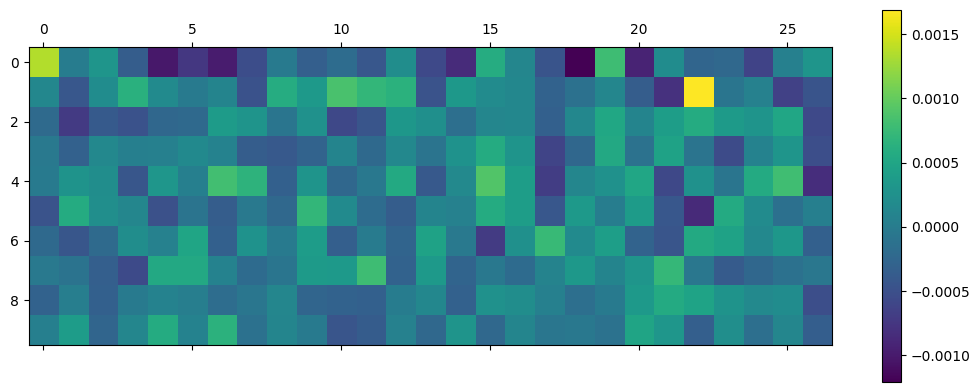

In [185]:
%matplotlib inline
plt.matshow(logits)
plt.colorbar()
plt.show()

In [197]:
F.softmax(logits[0]/0.01)

C:\Users\wanzh\AppData\Local\Temp\ipykernel_2056\308163823.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(logits[0]/0.01)


tensor([0.0432, 0.0378, 0.0389, 0.0365, 0.0341, 0.0351, 0.0342, 0.0358, 0.0377,
        0.0365, 0.0371, 0.0362, 0.0386, 0.0357, 0.0347, 0.0401, 0.0382, 0.0361,
        0.0335, 0.0409, 0.0345, 0.0385, 0.0368, 0.0369, 0.0355, 0.0380, 0.0389])

In [199]:
a = logits.max(dim=0).values.view(1,-1)
a

tensor([[0.0014, 0.0006, 0.0003, 0.0006, 0.0006, 0.0005, 0.0008, 0.0007, 0.0006,
         0.0007, 0.0009, 0.0008, 0.0006, 0.0005, 0.0003, 0.0009, 0.0004, 0.0007,
         0.0004, 0.0008, 0.0005, 0.0007, 0.0017, 0.0006, 0.0006, 0.0008, 0.0003]])

In [201]:
logits.mean(dim=0)

tensor([ 2.3923e-05, -7.1155e-05, -4.3820e-05, -7.1848e-05,  4.9135e-06,
         2.7340e-05,  2.5343e-05, -5.5981e-05, -3.5388e-05,  1.4687e-04,
        -6.0177e-05, -5.0842e-05,  1.0200e-04, -4.7762e-05, -5.1468e-05,
         2.2169e-04,  1.8540e-04, -1.9659e-04, -6.5368e-05,  2.6199e-04,
         4.4529e-05,  4.1069e-05,  1.9318e-04,  5.8888e-05,  4.6724e-05,
         1.3970e-04, -3.2324e-04])

In [188]:
torch.max(a)

tensor(0.0017)

In [189]:
torch.argmax(F.softmax(a/0.001, dim=1))

tensor(22)

In [125]:
for i in range(8):
    ev(path=path, i=i)

kNN: 0.94645	SVM: 0.9436500000000001
kNN: 0.94425	SVM: 0.94195
kNN: 0.9447	SVM: 0.9449500000000001
kNN: 0.9268	SVM: 0.92215
kNN: 0.9462	SVM: 0.9438000000000001
kNN: 0.94075	SVM: 0.9397499999999999
kNN: 0.9459	SVM: 0.9441499999999999
kNN: 0.9332	SVM: 0.9281499999999999


In [205]:
path = "DVHL__ppo__0805230735__3407_inference5"
data = np.load("./runs/{}/data_online_20000.npy".format(path))
labels = np.load("./runs/{}/labels_online_20000.npy".format(path))

reducer = pacmap.PaCMAP()
z = reducer.fit_transform(data)
# knn_clf = KNeighborsClassifier(n_neighbors=20)
# scores = cross_val_score(knn_clf, z, labels, cv=10)
# print(scores.mean())

avg_acc = knn_eval(X=z, y=labels, n_neighbors=5)
print("kNN: ", avg_acc)

svm_acc = faster_svm_eval(X=z, y=labels)
print("SVM: ", svm_acc)

kNN:  0.9558
SVM:  0.9525499999999999


In [208]:
reducer = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=10)
z = reducer.fit_transform(data)

avg_acc = knn_eval(X=z, y=labels, n_neighbors=5)
print("kNN: ", avg_acc)

svm_acc = faster_svm_eval(X=z, y=labels)
print("SVM: ", svm_acc)

kNN:  0.9607
SVM:  0.9589000000000001


In [210]:
reducer = pacmap.PaCMAP(n_neighbors=8, MN_ratio=0.5, FP_ratio=2.4)
z = reducer.fit_transform(data)

avg_acc = knn_eval(X=z, y=labels, n_neighbors=5)
print("kNN: ", avg_acc)

svm_acc = faster_svm_eval(X=z, y=labels)
print("SVM: ", svm_acc)

kNN:  0.95835
SVM:  0.9576499999999999


In [206]:
ev(path=path, i=0)

kNN: 0.9453	SVM: 0.9432499999999999


In [207]:
ev(path=path, i=1)

kNN: 0.9411	SVM: 0.9408


In [151]:
ev(path=path, i=2)

kNN: 0.93915	SVM: 0.9345000000000001


In [152]:
ev(path=path, i=3)

kNN: 0.9334	SVM: 0.9313


In [153]:
ev(path=path, i=4)

kNN: 0.913	SVM: 0.9075999999999999


In [114]:
ev(path=path, i=5)

kNN: 0.94075	SVM: 0.9397499999999999


In [115]:
ev(path=path, i=6)

kNN: 0.9459	SVM: 0.9441499999999999


In [116]:
ev(path=path, i=7)

kNN: 0.9332	SVM: 0.9281499999999999


In [117]:
for i in range(8):

    k = torch.load(os.path.join("./runs/", path, "n_neighbours_{}.pt".format(i)))
    m = torch.load(os.path.join("./runs/", path, "MN_ratio_{}.pt").format(i))
    n = torch.load(os.path.join("./runs/", path, "FP_ratio_{}.pt").format(i))

    print(k[0], m[0], n[0])

10 0.5 1.6
10 0.4 1.2800000000000002
8 0.32000000000000006 1.2800000000000002
10 0.32000000000000006 1.0240000000000002
8 0.38400000000000006 1.0240000000000002
8 0.46080000000000004 1.0240000000000002
6 0.3686400000000001 0.8192000000000003
7 0.4423680000000001 0.8192000000000003


In [81]:
import itertools

alpha_values = [0.8, 1.0, 1.2]                # value range of ratio of kNN
beta_values = [0.8, 1.0, 1.2]                 # value range of ratio of mid-pairs
gamma_values = [0.8, 1.0, 1.2]                # value range of ratio of negatives


# 3 * 3 * 3 = 27 actions (0,1,...,26)
combinations = np.array(
    list(itertools.product(alpha_values, beta_values, gamma_values))
)

combinations

array([[0.8, 0.8, 0.8],
       [0.8, 0.8, 1. ],
       [0.8, 0.8, 1.2],
       [0.8, 1. , 0.8],
       [0.8, 1. , 1. ],
       [0.8, 1. , 1.2],
       [0.8, 1.2, 0.8],
       [0.8, 1.2, 1. ],
       [0.8, 1.2, 1.2],
       [1. , 0.8, 0.8],
       [1. , 0.8, 1. ],
       [1. , 0.8, 1.2],
       [1. , 1. , 0.8],
       [1. , 1. , 1. ],
       [1. , 1. , 1.2],
       [1. , 1.2, 0.8],
       [1. , 1.2, 1. ],
       [1. , 1.2, 1.2],
       [1.2, 0.8, 0.8],
       [1.2, 0.8, 1. ],
       [1.2, 0.8, 1.2],
       [1.2, 1. , 0.8],
       [1.2, 1. , 1. ],
       [1.2, 1. , 1.2],
       [1.2, 1.2, 0.8],
       [1.2, 1.2, 1. ],
       [1.2, 1.2, 1.2]])

# rebuttal

In [9]:
from utils import *

import umap
import pacmap
import openTSNE

In [10]:
data = np.load("./data/MNIST/X_train.npy")
labels = np.load("./data/MNIST/y_train.npy")

data.shape, labels.shape

((60000, 784), (60000,))

In [11]:
np.random.seed(0)

idx = np.random.choice(data.shape[0], 20000, replace=False)
idx

array([ 3048, 19563, 58303, ..., 19462,  6147, 54474])

In [12]:
data = data[idx]
labels = labels[idx]

In [13]:
from myPaCMAP import *

MN_ratio = np.ones(data.shape[0]) * 1.0
FP_ratio = np.ones(data.shape[0]) * 5.0

n_neighbors = np.round(np.ones(data.shape[0]) * 10).astype(np.int32)
n_MN = np.round(n_neighbors * MN_ratio).astype(np.int32)
n_FP = np.round(n_neighbors * FP_ratio).astype(np.int32)

near = np.ones(data.shape[0]).astype(np.int32)

In [14]:
# generate kNN neighbors, mid-pairs, negatives
pair_neighbors, pair_MN, pair_FP, tree = generate_pair(
    data, n_neighbors, n_MN, n_FP, distance='euclidean', verbose=False, near=near
)

50


In [15]:
np.save("./pair_neighbors.npy", pair_neighbors)
np.save("./pair_MN.npy", pair_MN)
np.save("./pair_FP.npy", pair_FP)

In [16]:
pair_neighbors = np.load("./pair_neighbors.npy")
pair_MN = np.load("./pair_MN.npy")
pair_FP = np.load("./pair_FP.npy")

In [18]:
pacmap_reducer = myPaCMAP(
    n_components=2, 
    n_neighbors=n_neighbors, 
    MN_ratio=MN_ratio, 
    FP_ratio=FP_ratio, 
    pair_MN=pair_MN,
    pair_FP=pair_FP,
    nn_extra=20000, 
    near=near
)
print("here1")
pacmap_z = pacmap_reducer.fit_transform(
    data, 
    n_neighbors=n_neighbors, 
    n_MN=n_MN,
    n_FP=n_FP,
    use_N_MN_FP=np.array([1,0,0]).astype(np.int32))
print("here2")

here1
20000
here2


d:\DVHL\utils.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


<Figure size 6000x6000 with 0 Axes>

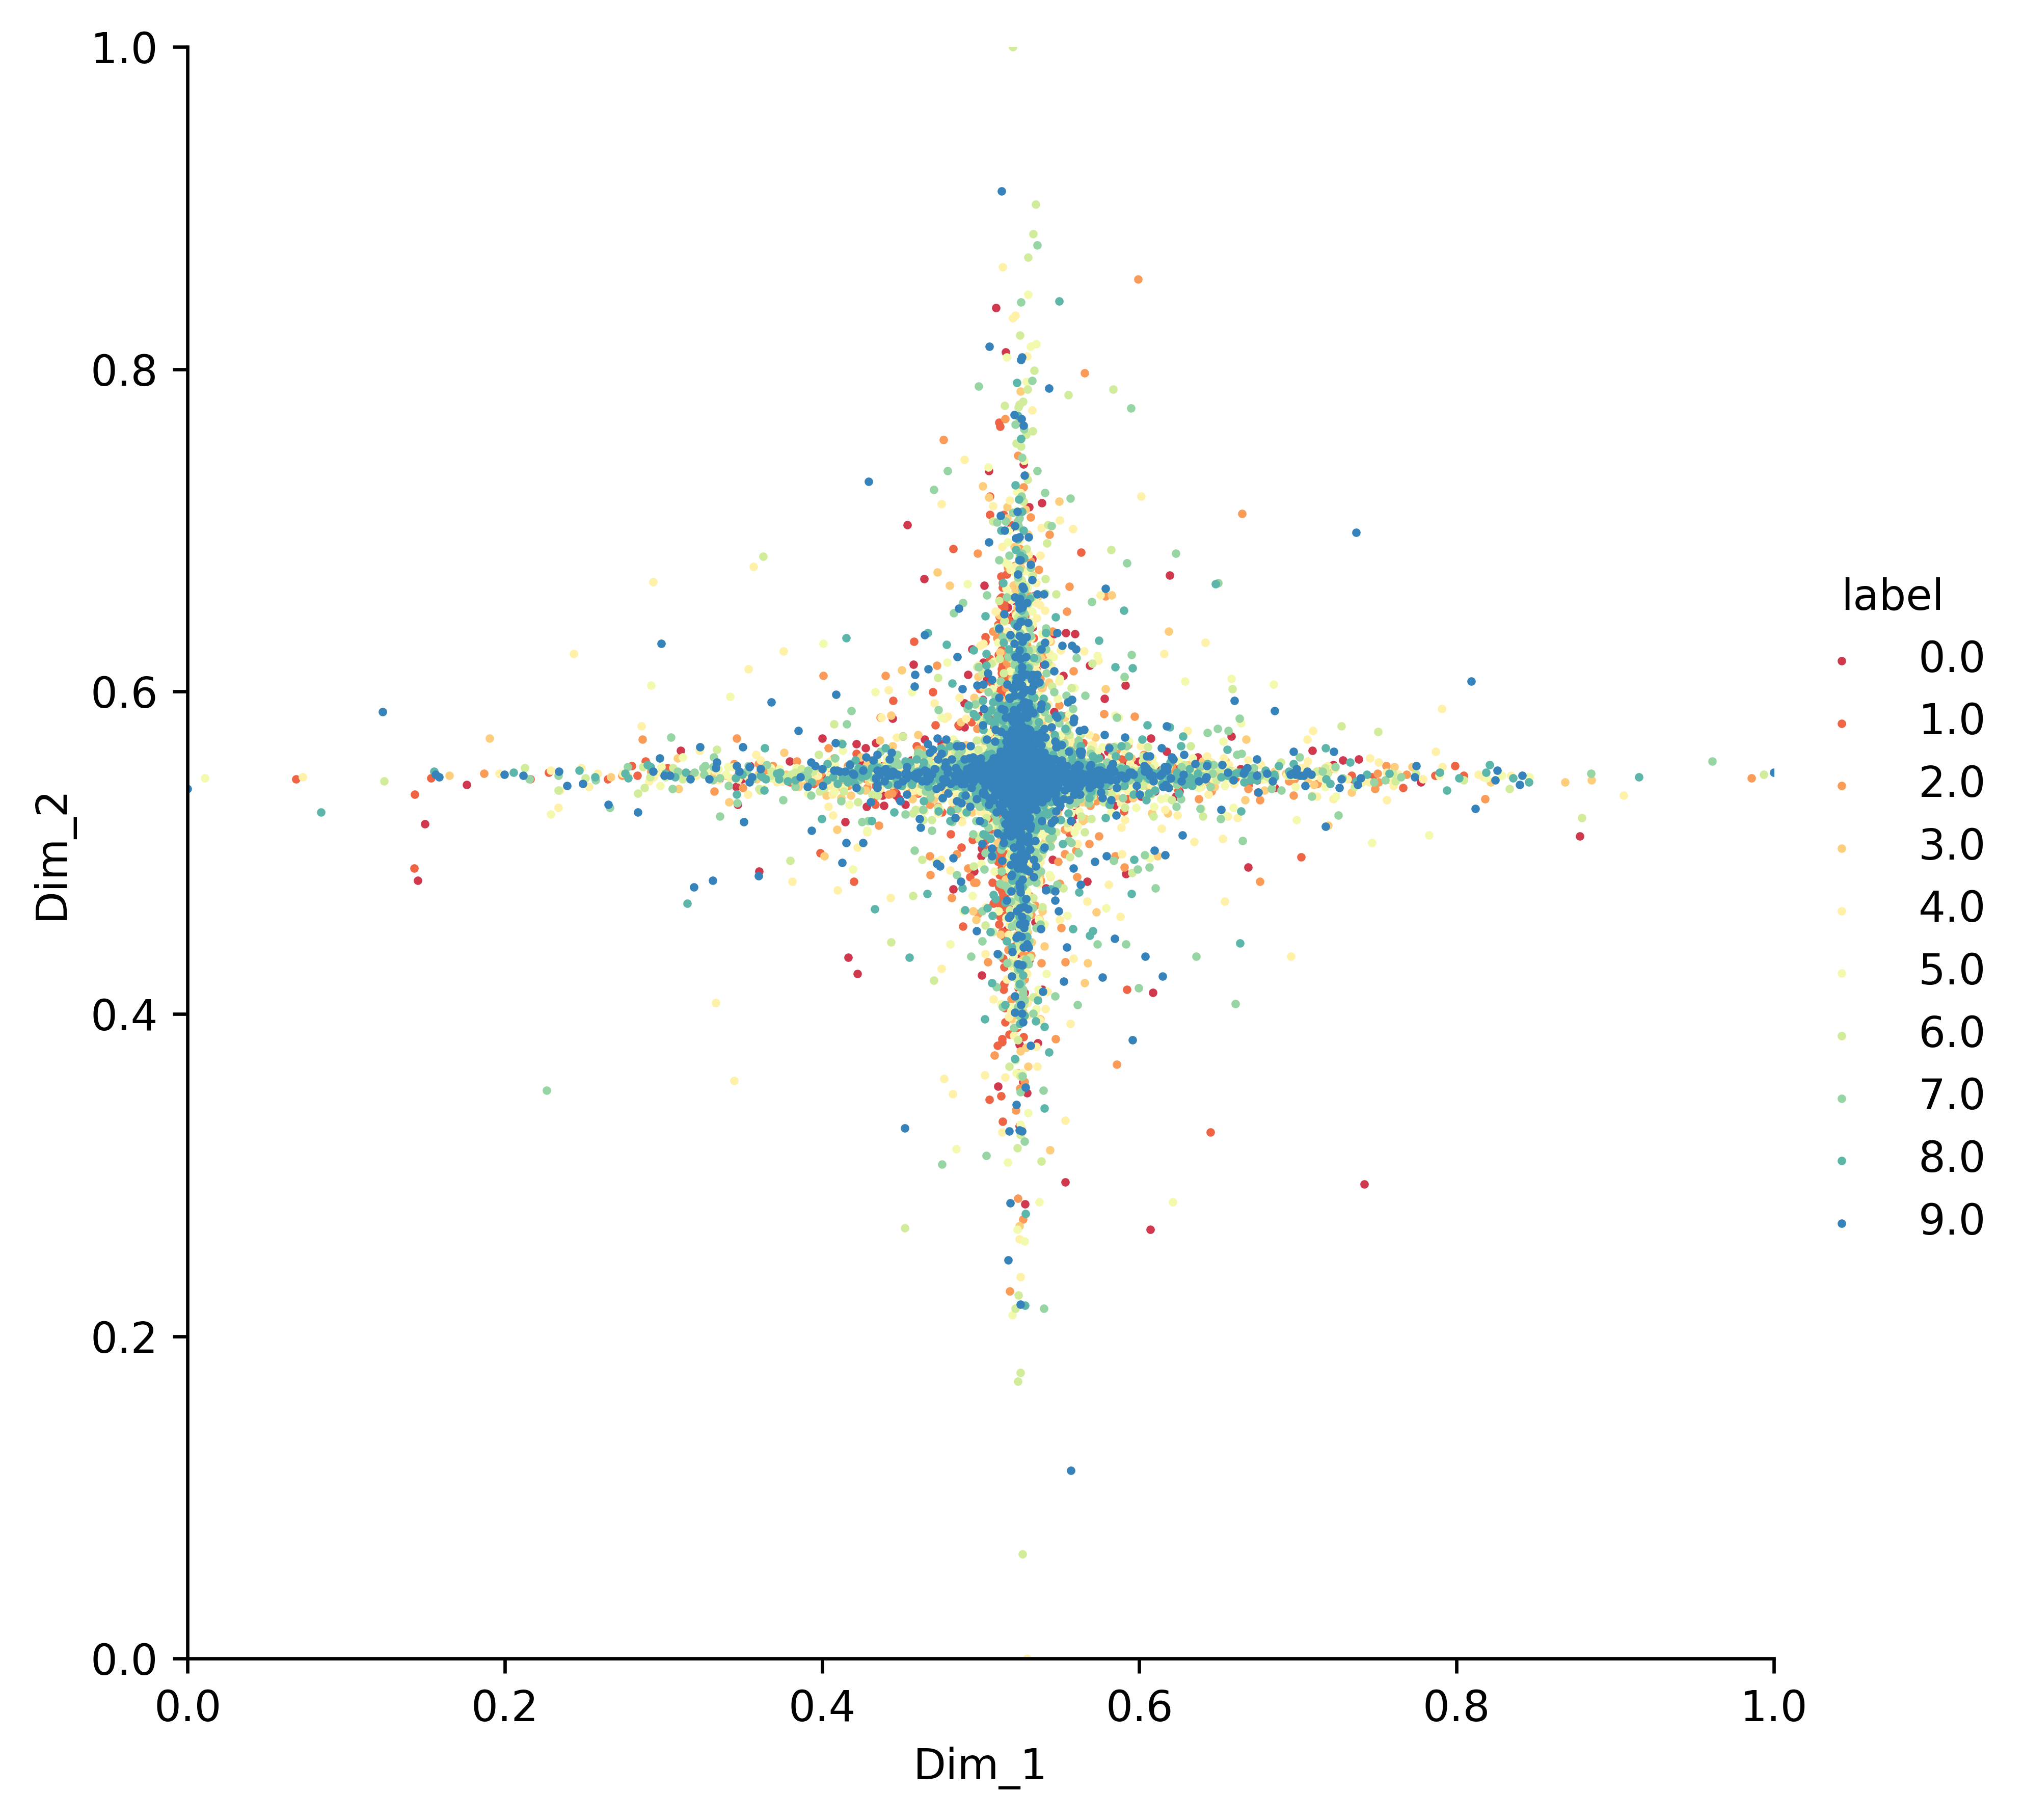

In [20]:
%matplotlib inline
draw_z(z=normalise(pacmap_z), cls=labels, s=1, display=True)

here1
20000
here2


<Figure size 6000x6000 with 0 Axes>

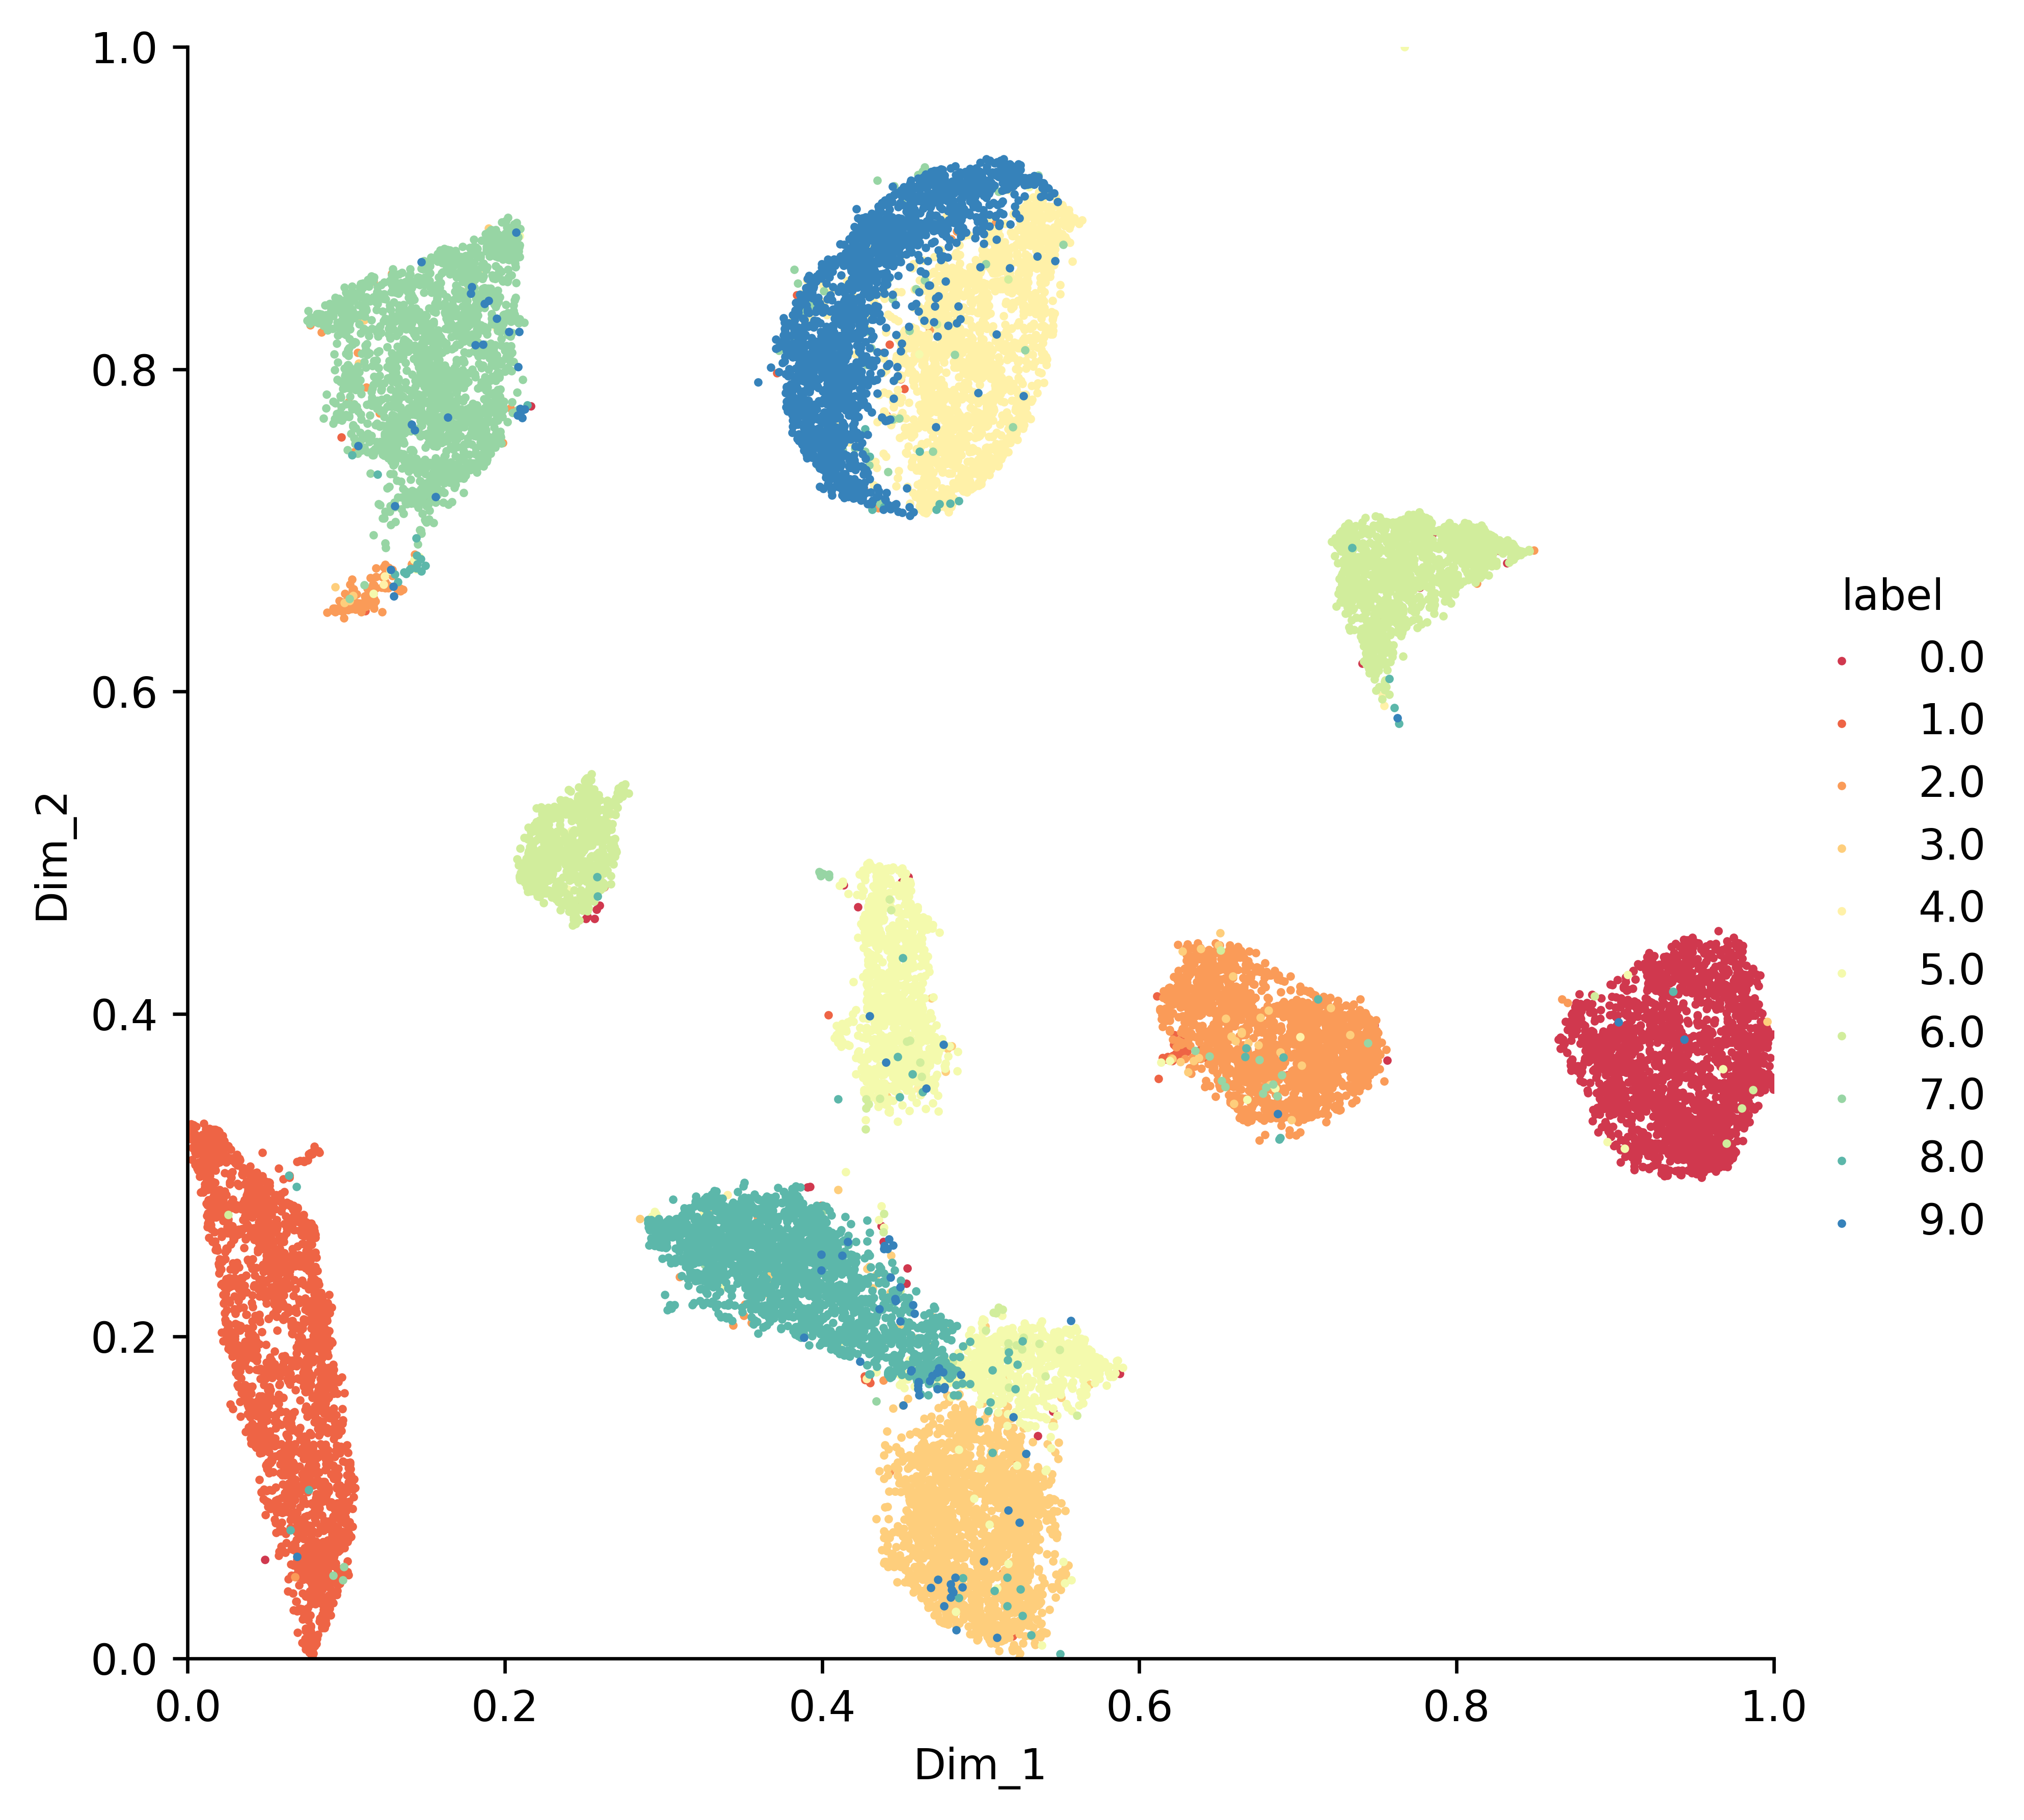

In [21]:
pacmap_reducer = myPaCMAP(
    n_components=2, 
    n_neighbors=n_neighbors, 
    MN_ratio=MN_ratio, 
    FP_ratio=FP_ratio, 
    pair_MN=pair_MN,
    pair_FP=pair_FP,
    nn_extra=20000, 
    near=near
)
print("here1")
pacmap_z = pacmap_reducer.fit_transform(
    data, 
    n_neighbors=n_neighbors, 
    n_MN=n_MN,
    n_FP=n_FP,
    use_N_MN_FP=np.array([1,0,1]).astype(np.int32))
print("here2")

%matplotlib inline
draw_z(z=normalise(pacmap_z), cls=labels, s=1, display=True)

In [22]:
np.save("./pacmap_nearest_101.npy", pacmap_z)

In [35]:
from myPaCMAP import *

MN_ratio = np.ones(data.shape[0]) * 0.5
FP_ratio = np.ones(data.shape[0]) * 2.0

n_neighbors = np.round(np.ones(data.shape[0]) * 10).astype(np.int32)
n_MN = np.round(n_neighbors * MN_ratio).astype(np.int32)
n_FP = np.round(n_neighbors * FP_ratio).astype(np.int32)

# for i in range(len(labels)):
#     if labels[i]==1:
#         n_neighbors[i] = 

near = np.ones(data.shape[0]).astype(np.int32)

here1
50
here2


<Figure size 6000x6000 with 0 Axes>

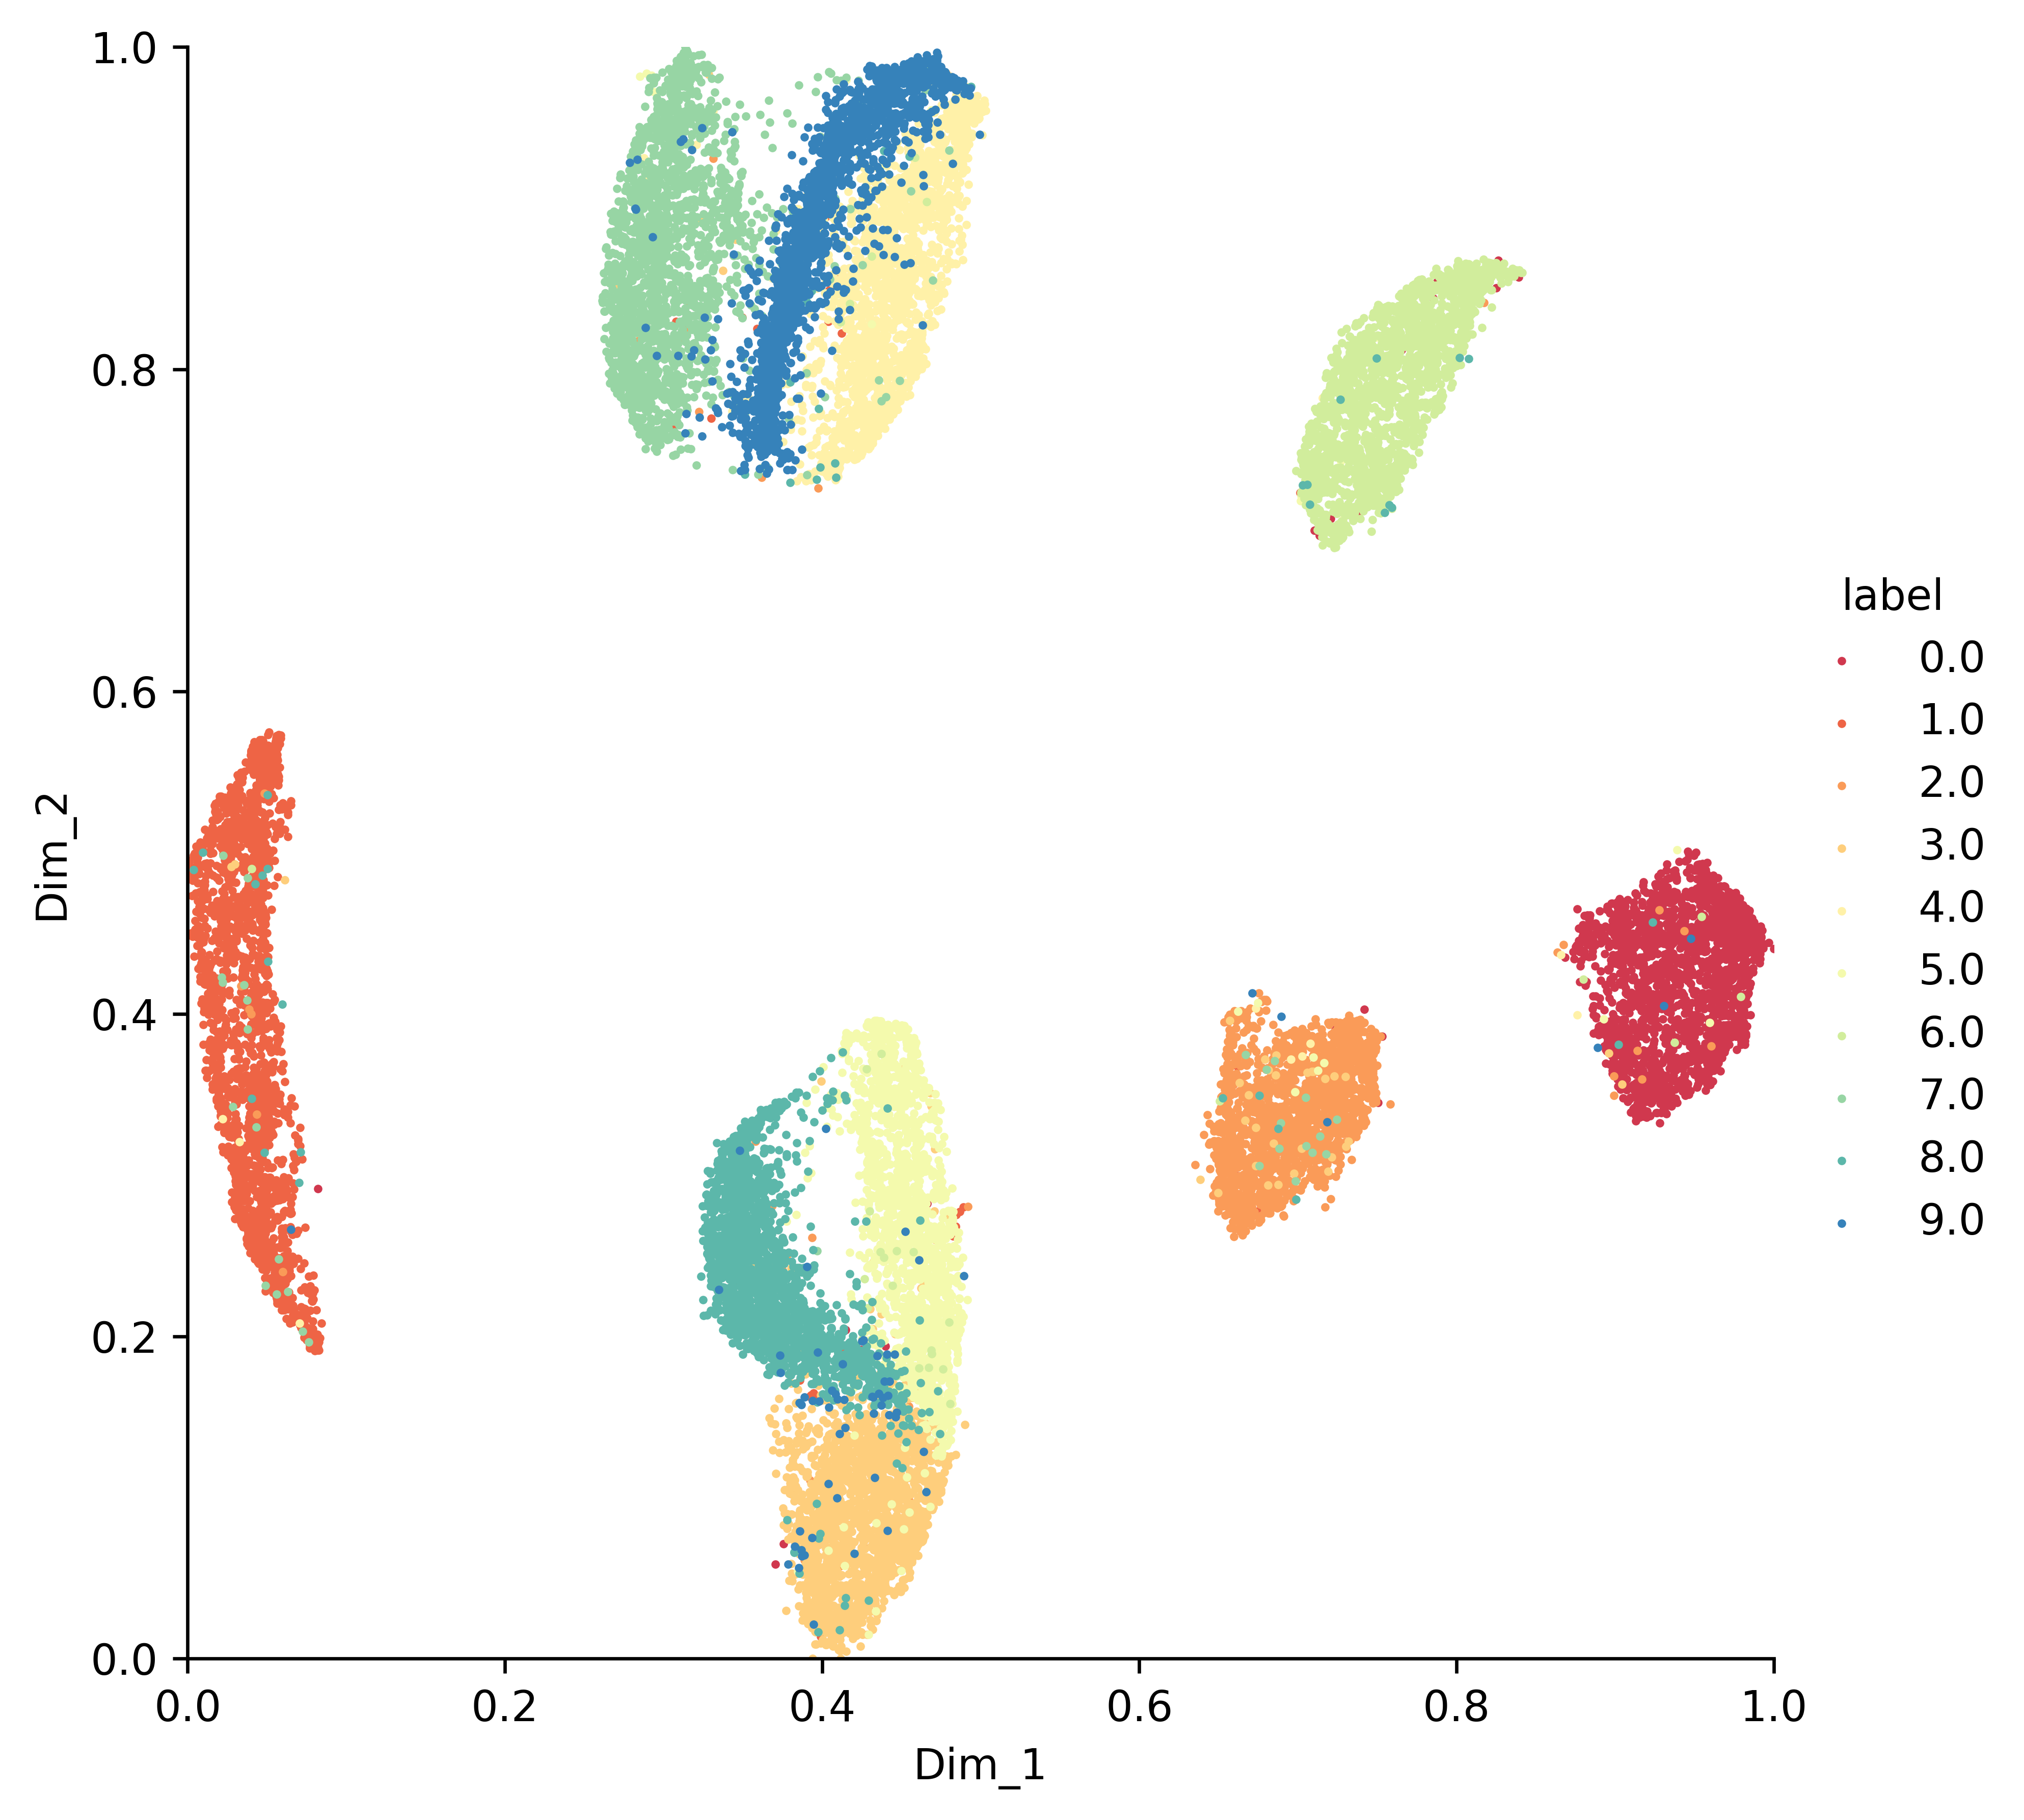

In [36]:
# this is normal one

pacmap_reducer = myPaCMAP(
    n_components=2, 
    n_neighbors=n_neighbors, 
    MN_ratio=MN_ratio, 
    FP_ratio=FP_ratio, 
    pair_MN=pair_MN,
    pair_FP=pair_FP,
    nn_extra=50, 
    near=near
)
print("here1")
pacmap_z = pacmap_reducer.fit_transform(
    data, 
    n_neighbors=n_neighbors, 
    n_MN=n_MN,
    n_FP=n_FP,
    use_N_MN_FP=np.array([1,1,1]).astype(np.int32))
print("here2")

%matplotlib inline
draw_z(z=normalise(pacmap_z), cls=labels, s=1, display=True)

In [54]:
from myPaCMAP import *

MN_ratio = np.ones(data.shape[0]) * 0.5
FP_ratio = np.ones(data.shape[0]) * 2.0

n_neighbors = np.round(np.ones(data.shape[0]) * 10).astype(np.int32)
n_MN = np.round(n_neighbors * MN_ratio).astype(np.int32)
n_FP = np.round(n_neighbors * FP_ratio).astype(np.int32)

# for i in range(len(labels)):
#     if labels[i]==1:
#         n_neighbors[i] = 

near = np.ones(data.shape[0]).astype(np.int32)

here1
50
here2


<Figure size 6000x6000 with 0 Axes>

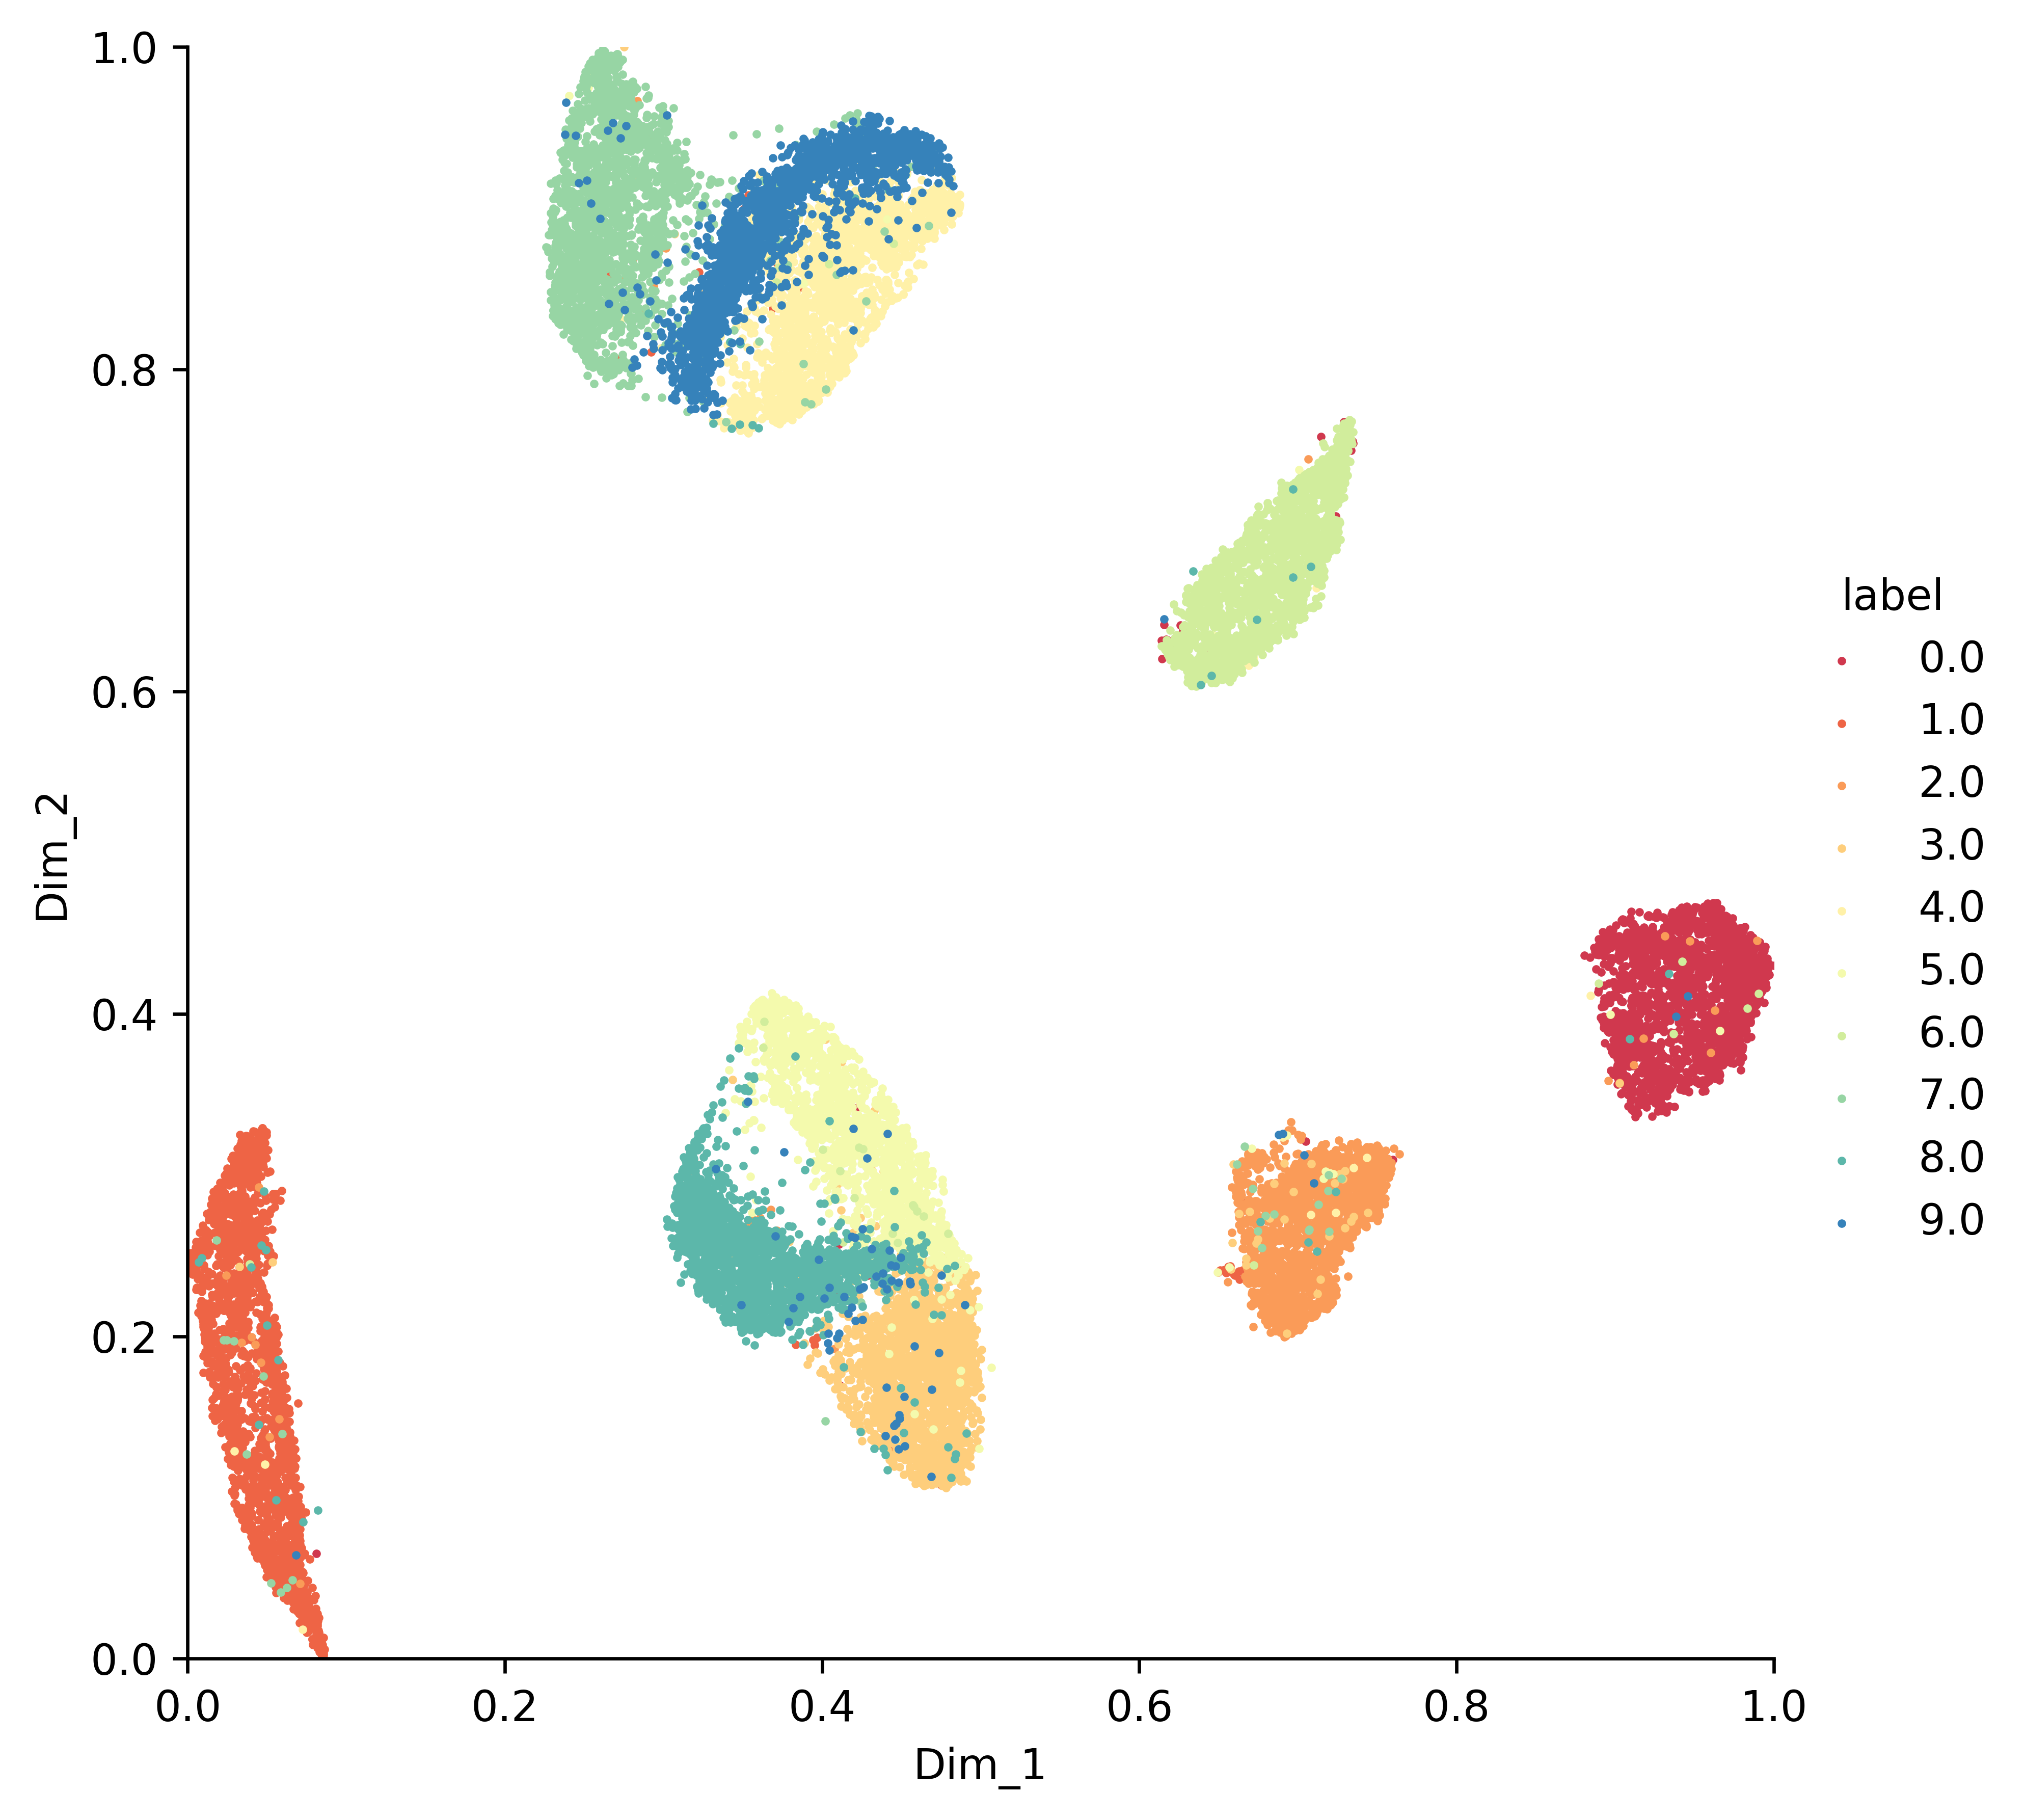

In [55]:
# this is normal one with MN_ratio=0.1

pacmap_reducer = myPaCMAP(
    n_components=2, 
    n_neighbors=n_neighbors, 
    MN_ratio=MN_ratio, 
    FP_ratio=FP_ratio, 
    pair_MN=pair_MN,
    pair_FP=pair_FP,
    nn_extra=50, 
    near=near
)
print("here1")
pacmap_z = pacmap_reducer.fit_transform(
    data, 
    n_neighbors=n_neighbors, 
    n_MN=n_MN,
    n_FP=n_FP,
    use_N_MN_FP=np.array([1,0,1]).astype(np.int32))
print("here2")

%matplotlib inline
draw_z(z=normalise(pacmap_z), cls=labels, s=1, display=True)

In [37]:
from myPaCMAP import *

MN_ratio = np.ones(data.shape[0]) * 0.1
FP_ratio = np.ones(data.shape[0]) * 2.0

n_neighbors = np.round(np.ones(data.shape[0]) * 10).astype(np.int32)
n_MN = np.round(n_neighbors * MN_ratio).astype(np.int32)
n_FP = np.round(n_neighbors * FP_ratio).astype(np.int32)

# for i in range(len(labels)):
#     if labels[i]==1:
#         n_neighbors[i] = 

near = np.ones(data.shape[0]).astype(np.int32)

here1
50
here2


<Figure size 6000x6000 with 0 Axes>

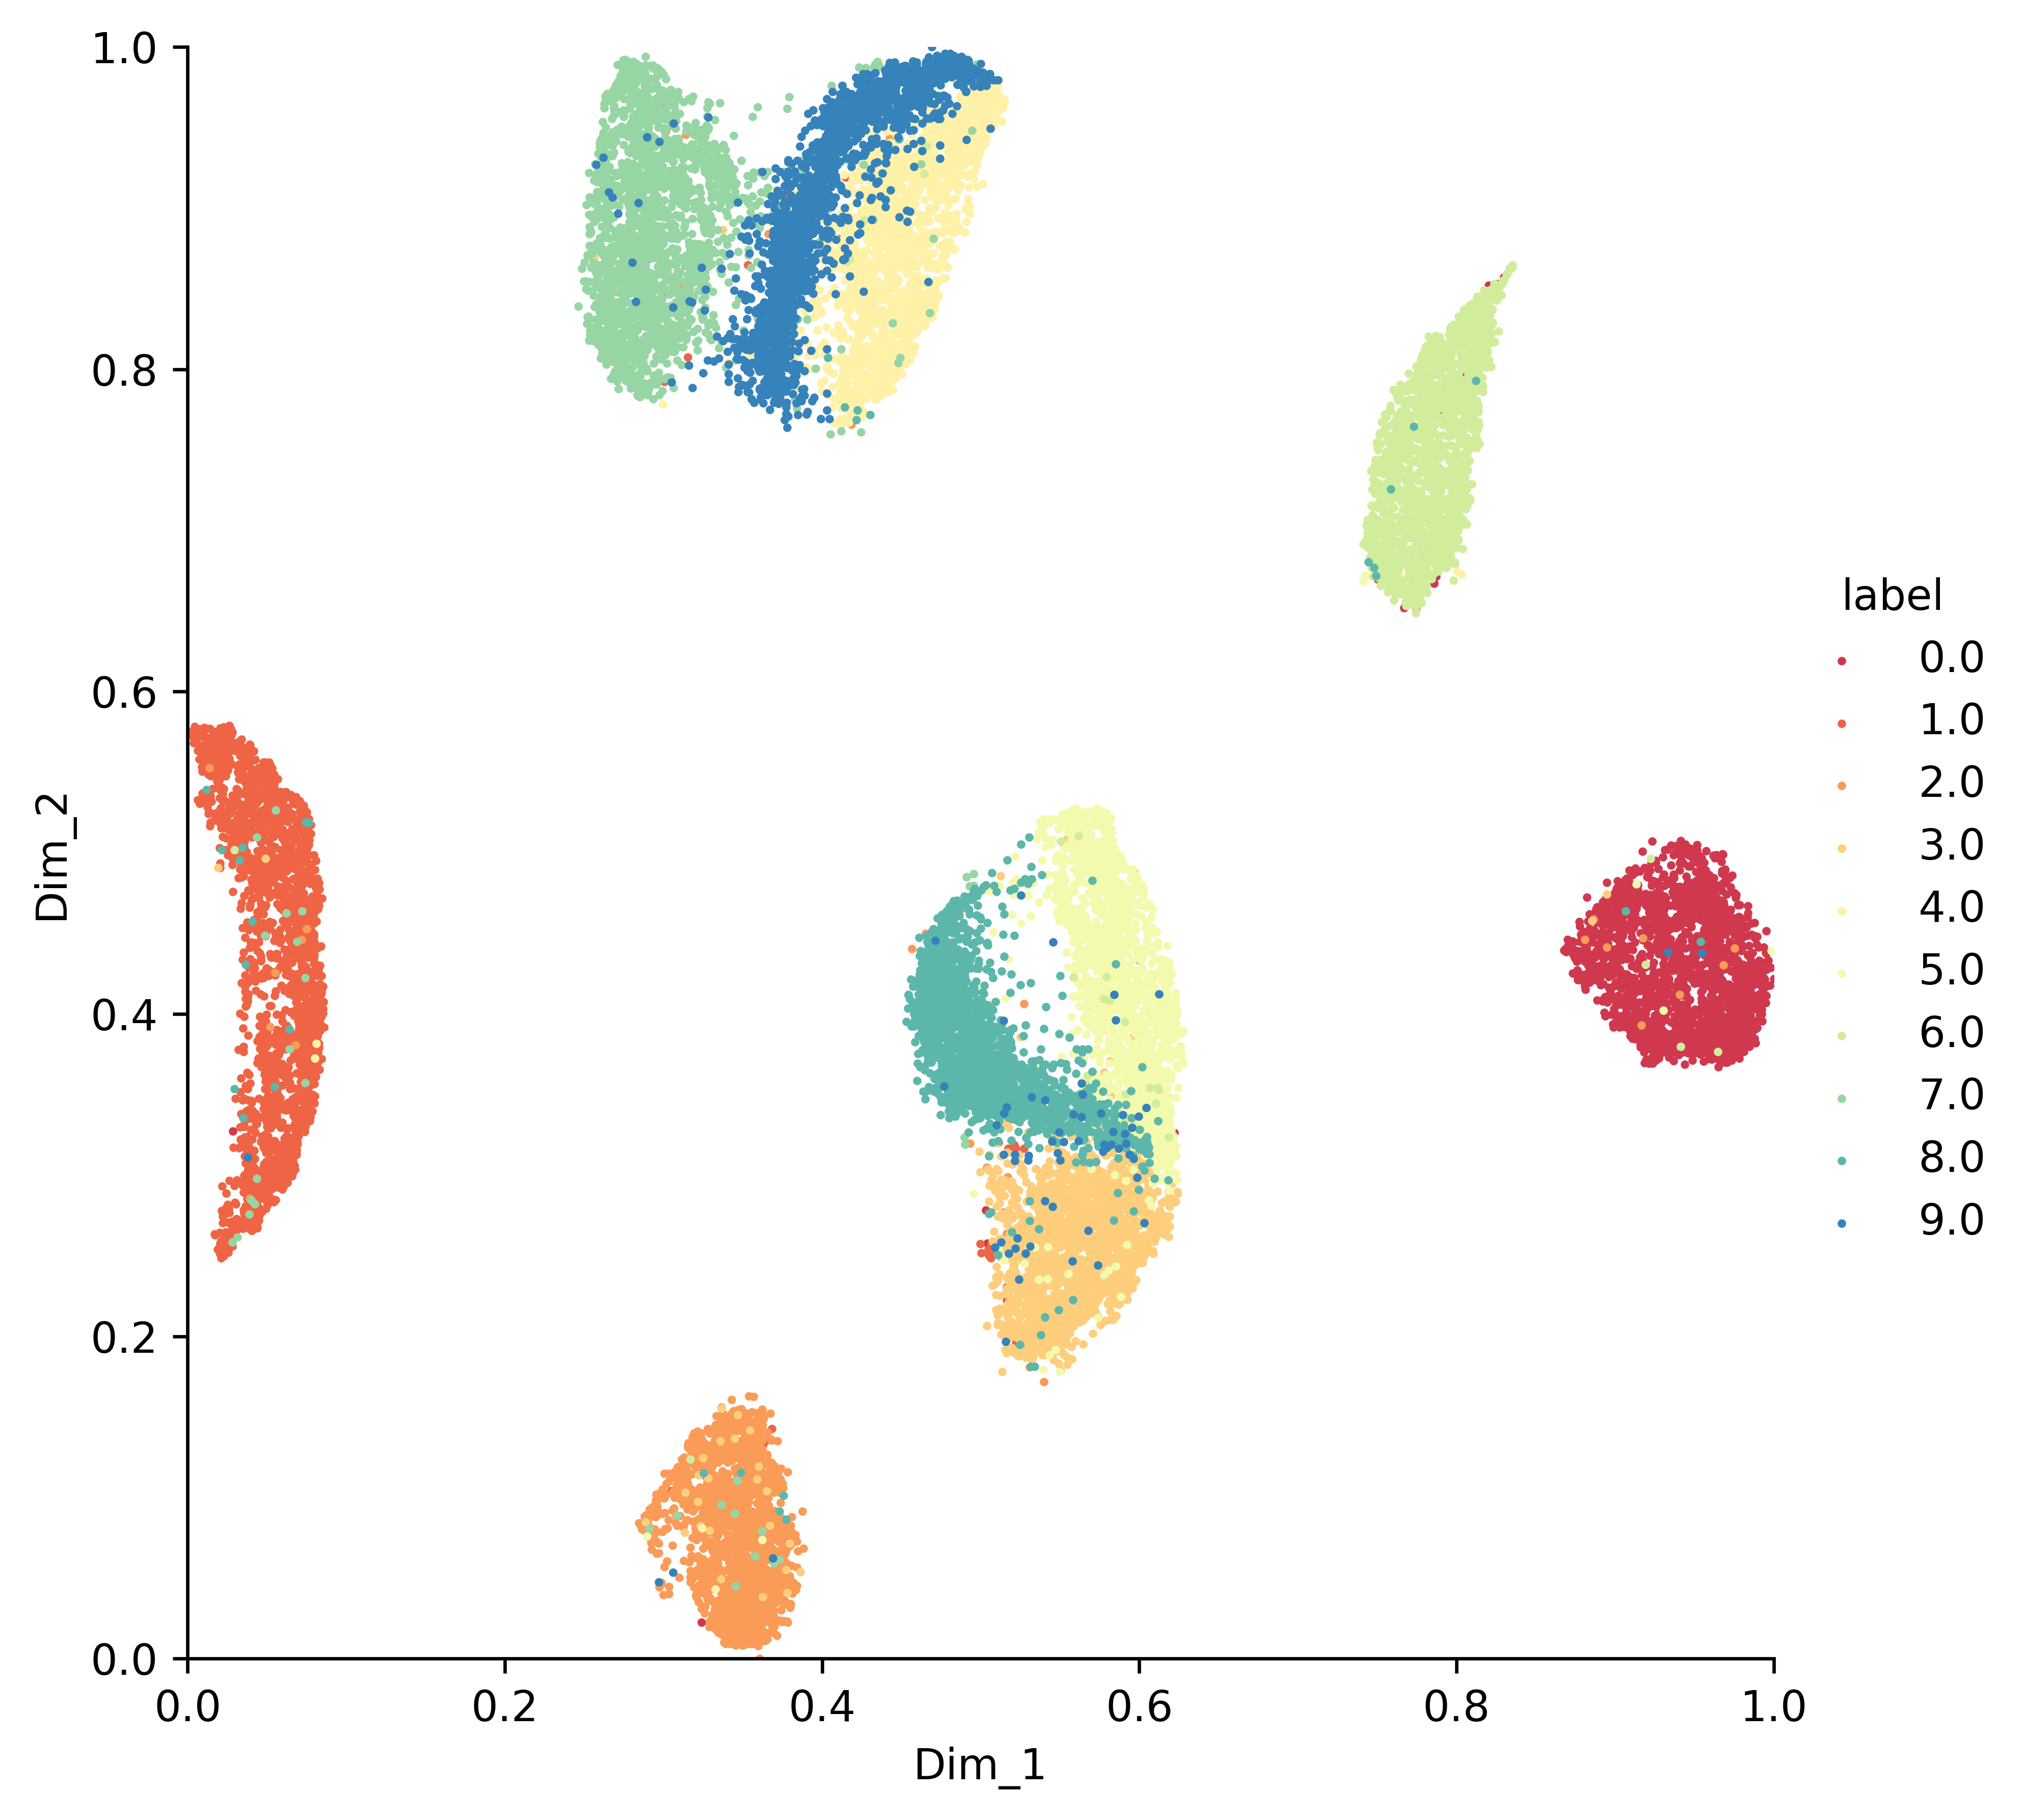

In [38]:
# this is normal one with MN_ratio=0.1

pacmap_reducer = myPaCMAP(
    n_components=2, 
    n_neighbors=n_neighbors, 
    MN_ratio=MN_ratio, 
    FP_ratio=FP_ratio, 
    pair_MN=pair_MN,
    pair_FP=pair_FP,
    nn_extra=50, 
    near=near
)
print("here1")
pacmap_z = pacmap_reducer.fit_transform(
    data, 
    n_neighbors=n_neighbors, 
    n_MN=n_MN,
    n_FP=n_FP,
    use_N_MN_FP=np.array([1,1,1]).astype(np.int32))
print("here2")

%matplotlib inline
draw_z(z=normalise(pacmap_z), cls=labels, s=1, display=True)

here1
50
here2


<Figure size 6000x6000 with 0 Axes>

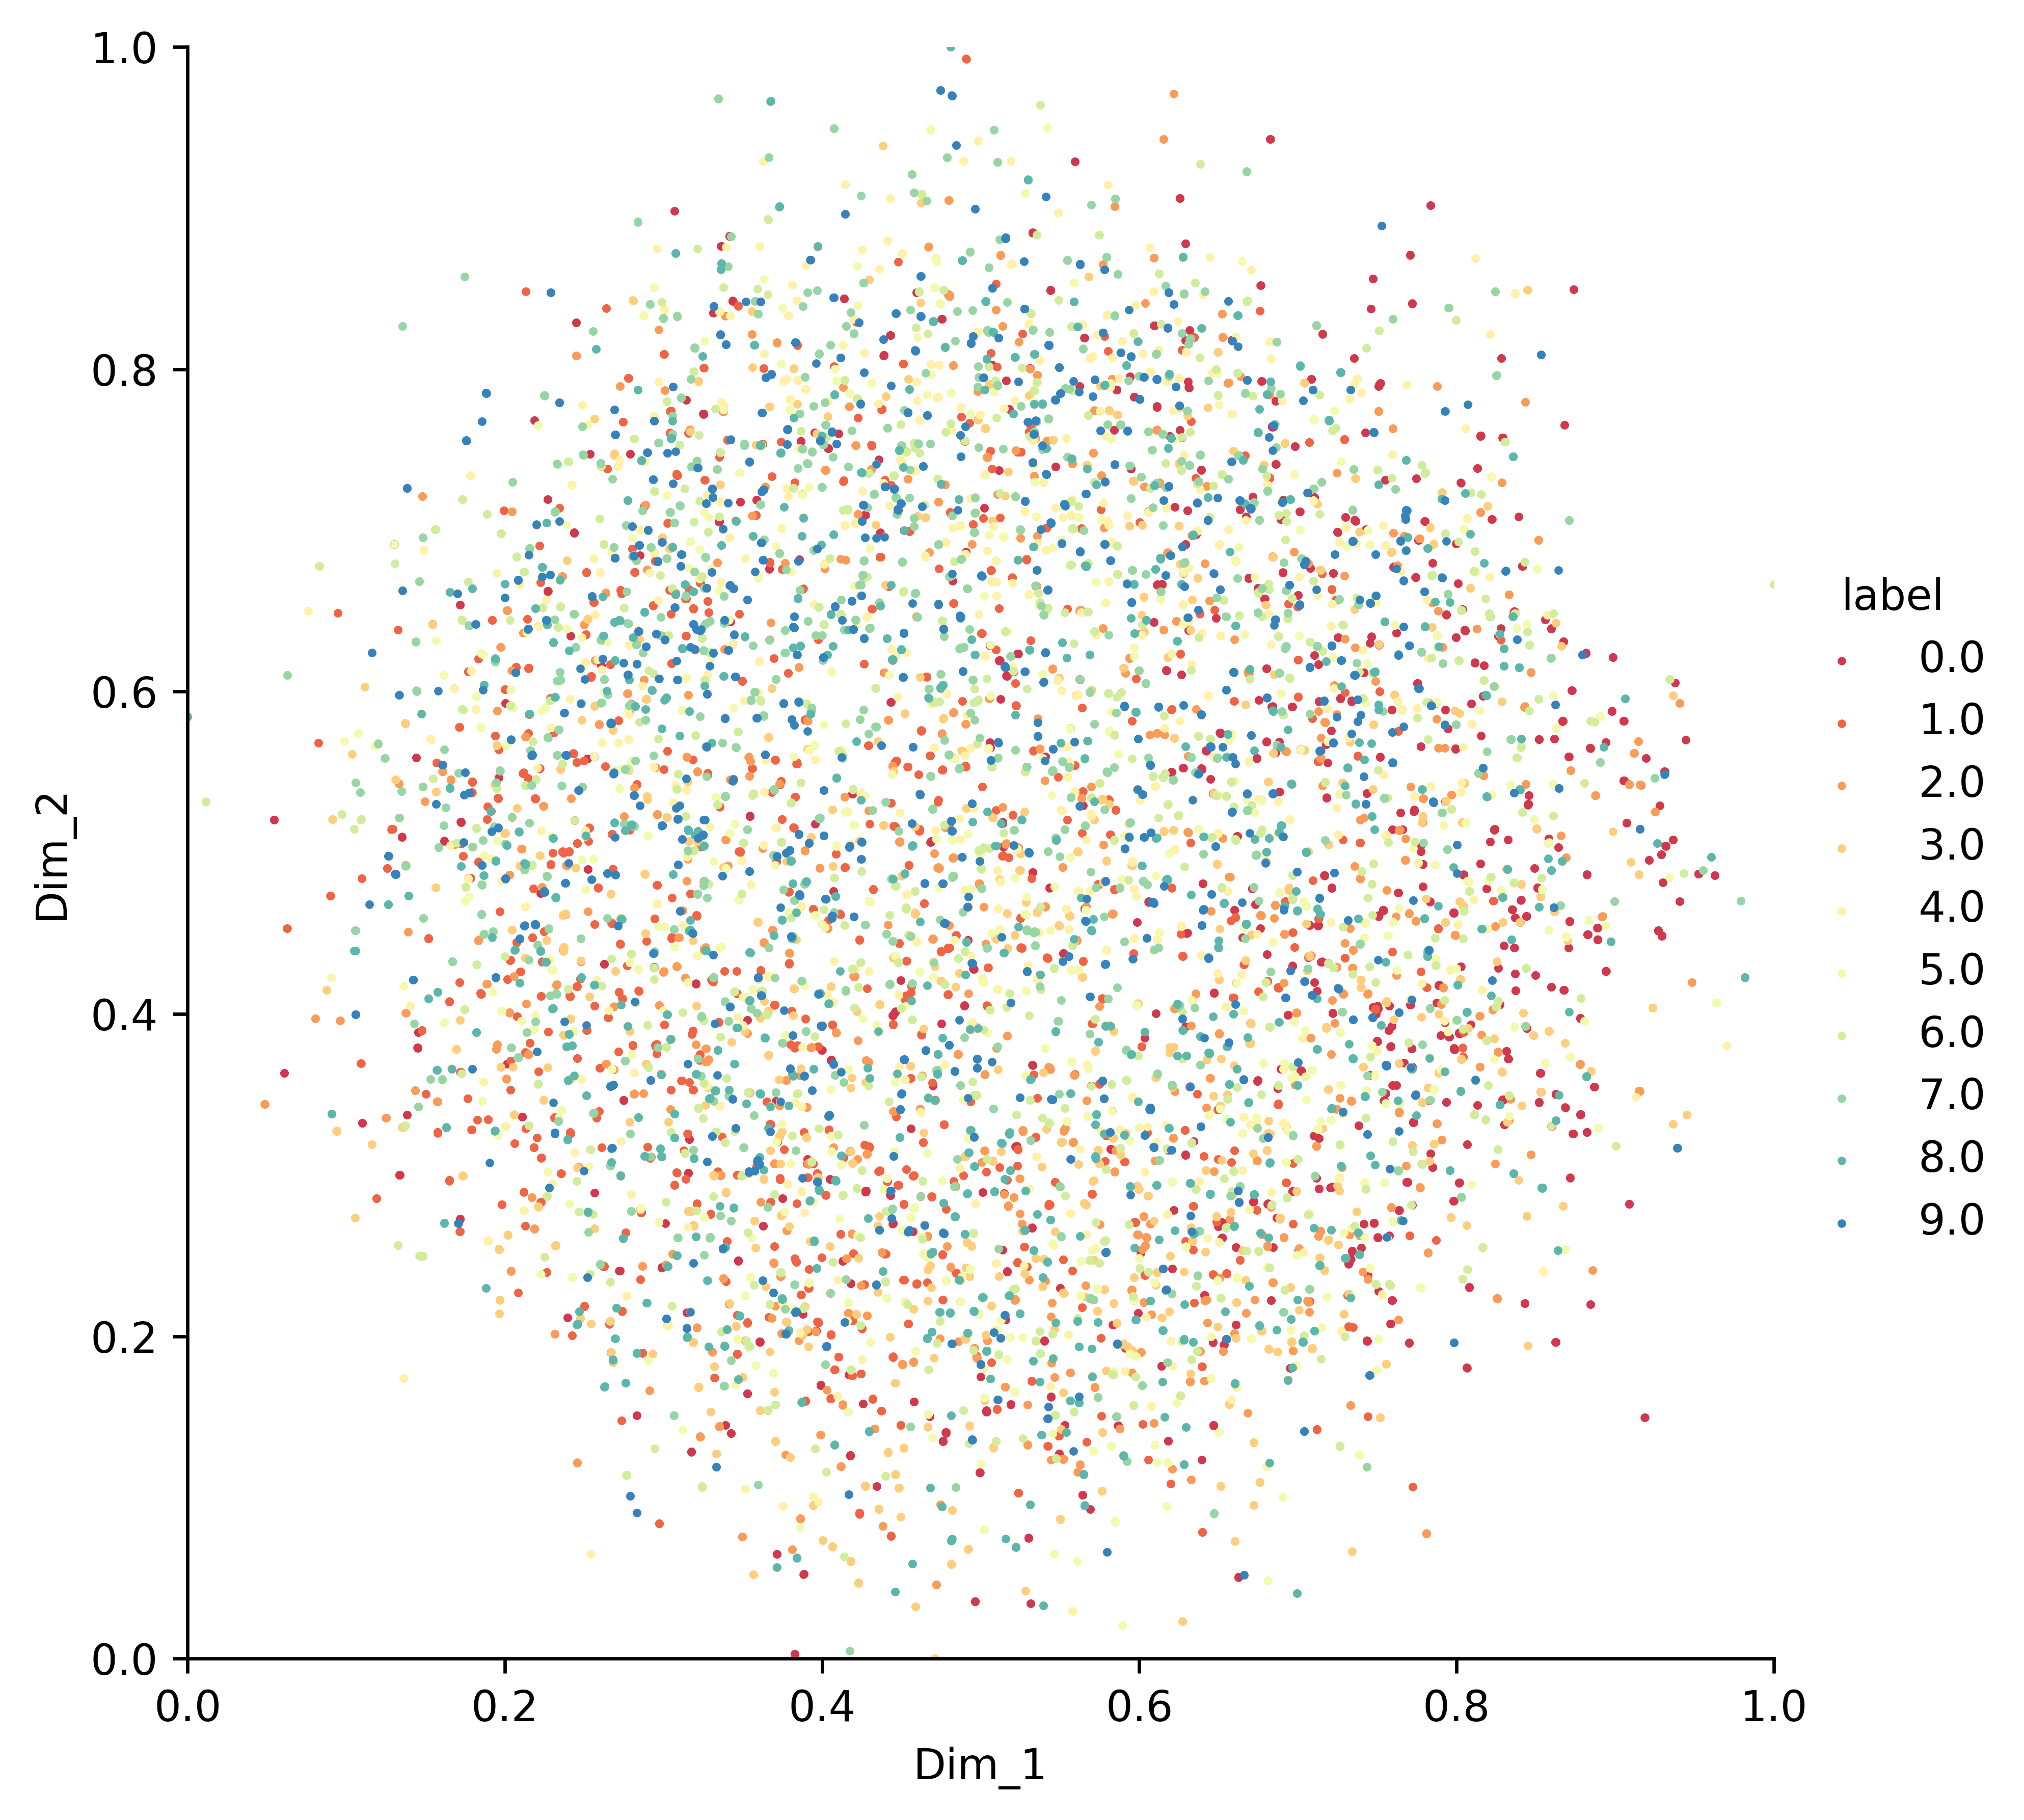

In [58]:

# this is 3) case: class 1 is normally preserved (10-0.5-20), while others are (1-1-20)

from myPaCMAP import *

MN_ratio = np.ones(data.shape[0]) * 5
FP_ratio = np.ones(data.shape[0]) * 10.0 #2.0

n_neighbors = np.round(np.ones(data.shape[0]) * 100).astype(np.int32)
n_MN = np.round(n_neighbors * MN_ratio).astype(np.int32)
n_FP = np.round(n_neighbors * FP_ratio).astype(np.int32)

for i in range(len(labels)):
    if labels[i]!=3 or labels[i]!=5 or labels[i]!=8:
    # if labels[i]!=0:
        n_neighbors[i] = 1
        n_MN[i] = 1
        n_FP[i] = 2

near = np.ones(data.shape[0]).astype(np.int32)

pacmap_reducer = myPaCMAP(
    n_components=2, 
    n_neighbors=n_neighbors, 
    MN_ratio=MN_ratio, 
    FP_ratio=FP_ratio, 
    pair_MN=pair_MN,
    pair_FP=pair_FP,
    nn_extra=50, 
    near=near
)
print("here1")
pacmap_z = pacmap_reducer.fit_transform(
    data, 
    n_neighbors=n_neighbors, 
    n_MN=n_MN,
    n_FP=n_FP,
    use_N_MN_FP=np.array([1,1,1]).astype(np.int32))
print("here2")

%matplotlib inline
draw_z(z=normalise(pacmap_z), cls=labels, s=1, display=True)